
# 2. 실습 환경 설정과 파이토치 기초


## 2.0 환경구축

### 2.0.1 아나콘다 설치

웹 사이트 : http://www.anaconda/com/products/individual
* 파이토리와의 호환성문제로 인하여 설치 시 3.9 버전으로 합니다.

### 2.0.2 가상환경

####  가상환경 확인

* conda env list

![nn](./02_env_list_01.png)

<img src="https://github.com/harmonics98/Engineering-Design/blob/main/02_env_list_01.png"></img>

####  가상 환경 생성

* conda create -n [환경명] python=[버전]
> conda create -n torch_book python=3.9
* conda env list

<img src="03_env_list_02.png" width = 600></img>

####  가상 환경 활성화

* conda activate [환경명]
    > conda activate torch_book
    
<img src="04_active_env.png" width = 600></img>
가상환경 비활성화
* conda deactivate

#### 가상 환경 삭제

삭제하고자 하는 환경의 상위에서, 이 시점에서는 base에서 작업해야 합니다.  
* conda env remove -n [환경명]

####  커널 설치

가상 환경을 활성화 한 후 커널을 설치합니다.
* pip install ipykernel

이어서 커널을 연결합니다.
* python -m ipykernel install --user --name torch_book --display-name "torch_book"

#### 파이토치 설치하기

패키지의 분리를 위해 생성한 가상환경 아래에서 설치합시다.  
책과의 호환을 맞추기 위해 책에서 요구하는 버전으로 설치합니다.  

다음은 CPU만을 이용하여 파이토치를 사용하는 경우 설치하는 명령어 입니다.  

* conda install pytorch==1.9.0 torchvision=0.10.0 torchaudio==0.9.0 -c pytorch  

  
만약 GPU를 사용하여 파이토치를 사용하는 경우 CUDA와 cuDNN을 설치한 후 다음 명령어를 입력합니다. (세부사항은 8장 성능 최적화에 있습니다.)
* conda install pytorch torchivision torchaudio cudatoolkit=11.3 -c pytorch

#### Jupyter notebook 설치와 실행

jupyter notebook이 설치 되어 있는 데 왜 다시 설치하냐는 의문점이 생길 수 있습니다.  
현재 사용 중인 jupyter notebook은 "base" 에 설치되어 있는 jupyter notebook으로 가상환경 내에는 jupyter notebook이 설치되어 있지 않습니다. 
실제로 conda list로 검색 시 jupyter가 존재하지 않습니다.  

* pip install jupyter notebook
  
  
  
* jupyter notebook

실행 이후 Kernel - change Kernel을 통해 가상환경의 kernel로 변경합니다.
<img src="2-7.png" width = 600></img>

## 2.1 파이토치

> 2017년 초에 공개된 딥러닝 프레임 워크로, 과학 연산을 위한 라이브러리에서 시작되어 딥러닝 프레임워크로 발전한 것

###  파이토치의 특징

> GPU에서 텐서 조작 및 동적 신경망 구축이 가능한 프레임 워크

* GPU 
    * API CUDA, cuDNN 연산에 사용
    
    
* 동적 신경망
    * 훈련이 반복 될 때 네트워크의 변경, 업데이트가 가능한 신경망
    
    
* Tensor
    * 파이토치의 데이터 형태
    * 단일 데이터 형식의 다차원 행렬
    * 명령어의 추가로 GPU 연산 수행
    > 코드 | 축 | 표현  
    axis 0 = 행 = 벡터  
    axis 1 = 열 = 행렬  
    axis 2 = 채널 = 텐서
    
    텐서는 같은 형태의 행렬이 묶인 것



### 2.1.2 파이토치의 장점

* 단순함(효율적인 계산)
* 성능(낮은 CPU 활용)
* 직관적인 인터페이스

### 2.1.3 파이토치 아키텍처

파이토치의 전체적인 계층은 3가지로 이루어집니다.
* 파이토치 API
* 파이토치 엔진 : Autograd C++, Aten C++, JIT C++, Python API로 구성
* 연산처리 : 대부분의 계산을 수행

#### 파이토치 API
사용자가 다루는 API를 제공하는 계층으로 API를 통해 인터페이스를 제공하고 파이토치 엔진으로 작업을   전달합니다.
* torch : GPU를 지원하는 텐서 패키지. 텐서의 수학적 연산이 가능하도록 하는 패키지
* torch.autograd : 자동 미분 패키지. 변경사항을 즉시 계산하는 패키지
* torch.nn : 신경만 구축 및 훈련 패키지.
* torch.multiprocessing : 파이썬 멀티 프로세싱 패키지.
* torch.utils : 기타 유틸리티를 제공하는 패키지. 주로 사용하는 DataLoader,bottleneck,checkpoint 모듈

### 2.1.4 스토리지

텐서가 메모리에 저장될 때는 1차원 배열의 형태로 저장이 됩니다. 이 때 오프셋과 스트라이드라는 개념이 나옵니다.  
오프셋과 스트라이드가 나온 이유는 텐서를 구분하기 위함입니다.
* 오프셋(offset) : 텐서의 첫번째 요소가 저장된 인덱스
* 스트라이드(stride) : 차원을 넘어 다음 요소를 얻기 위해 넘어야 하는 요소의 개수
<img src="2-6.png" width = 600></img>
위의 그림에서 1차원으로 된 배열의 값은 동일합니다. offset은 이번 경우 동일하게 1입니다.  
$A$의 경우 다음 차원인 4를 얻기 위해서는 3개의 요소(1,2,3)을 넘어야 합니다 이에 따라 스트라이드는 (3,1)입니다.  
반면 $A^T$의 경우 다음 차원인 2를 얻기 위해서는 2개의 요소(1,4)를 넘어야 하므로 스트라이드는 (2,1)입니다.  
위와 같이 오프셋을 통해 텐서의 시작을, 스트라이드를 통해 행렬/텐서의 형태를 구분할 수 있습니다.

## 2.2 파이토치 문법

In [1]:
import torch
import numpy as np

### 텐서 생성과 변환

* torch.tensor()
* torch.FloatTensor() : 32비트의 부동 소수점
* torch.DoubleTensor() : 64비트의 부동 소수점
* torch.LongTensor() : 64비트의 부호가 있는 정수

생성 시 설정으로 device = "" 로 GPU 같은 기기에 생성을, dtype=torch.float64 로 dtype으로 설정할 수 있습니다. 

In [2]:
a = torch.tensor([[1,2],[3,4]])

b = torch.tensor([[3,4],[1,2],[5,6]])

print(a,"\n\n",b)

tensor([[1, 2],
        [3, 4]]) 

 tensor([[3, 4],
        [1, 2],
        [5, 6]])


텐서와 ndarry 간의 변경

In [3]:
c = a.numpy()

print(c)
print('--------------')
c = torch.from_numpy(c)
print(c)


[[1 2]
 [3 4]]
--------------
tensor([[1, 2],
        [3, 4]])


### 텐서의 인덱스 조작

텐서의 인덱스는 배열과 비슷하게 접근할 수 있습니다.  
배열에서 슬라이싱과 인덱스 번호로 지정하듯이, 텐서에서도 동일합니다. 

In [4]:
print(a)
print(a[0], a[0][1],a[1][1])
print('------------')
print(a[0:2])

tensor([[1, 2],
        [3, 4]])
tensor([1, 2]) tensor(2) tensor(4)
------------
tensor([[1, 2],
        [3, 4]])


### 텐서의 연산

텐서는 배열과 동일하게 수학연산이 가능합니다.  
다만, 타입과 열의 개수가 다르면 불가능합니다.

In [5]:
v = torch.tensor([1,2,3])
w = torch.tensor([3,4,6])
z = torch.tensor([[3,3,2],[1,2,3]])
x = torch.tensor([[3,3],[1,2]])

print(w-v)
print(w-z)
# print(x-w) # 에러 

tensor([2, 2, 3])
tensor([[0, 1, 4],
        [2, 2, 3]])


### 텐서의 차원조작

텐서의 차원은 신경망을 조작하며, 자주 다루어집니다.  
방법으로는 다음이 있습니다.
* view(shape) : 형태의 변경
* stack(tensor, dim) : 텐서들의 결합
* transpose(tensor, dim0, dim1) : 텐서의 전치
* cat(tensors, dim) : 텐서들의 결합  


In [6]:
a = torch.tensor([[1,2],[3,4]])
b = torch.tensor([[5,6],[7,8]])
print(a)
print(b)
print('----view----')
print(a.view(4,1))
print(a.view(2,2))
print('----stack----')
print(np.stack((a,b),axis=1))
print('--transpose--')
print(a.transpose(0,1))
print('-----cat-----')
print(torch.cat((a,b),0))
print(torch.cat((a,b),1))

tensor([[1, 2],
        [3, 4]])
tensor([[5, 6],
        [7, 8]])
----view----
tensor([[1],
        [2],
        [3],
        [4]])
tensor([[1, 2],
        [3, 4]])
----stack----
[[[1 2]
  [5 6]]

 [[3 4]
  [7 8]]]
--transpose--
tensor([[1, 3],
        [2, 4]])
-----cat-----
tensor([[1, 2],
        [3, 4],
        [5, 6],
        [7, 8]])
tensor([[1, 2, 5, 6],
        [3, 4, 7, 8]])


### 데이터 준비

파이토치에서 데이트호출은 파이썬 라이브러리 (pandas)를 이용하는 방법과 파이토치에서 제공하는 방법이 있습니다.  
데이터 이미지인 경우 전처리 후 배치단위로 분할 처리하며, 텍스트인 경우 임베딩을 걸쳐 서로 다른 길이의 시퀸스 단위로 분할 처리 합니다.  

### 파이토치에서 제공하는 데이터셋

파이토치에서는 MNIST, ImageNet을 포함하여 여러가지 데이터셋을 제공하고 있으며, https://pytorch.org/vision/0.8/datasets.html 에서 확인할 수 있습니다.  
파이토치에서 제공하는 데이터셋은 requests 라이브러리를 요구합니다. 

### 커스텀 데이터셋

딥러닝 시 데이터를 한번에 대량으로 가져가면 비용 측면에서 비효율적입니다.  
따라서 데이터를 나눠서 호출하는 것이 효율적이며 이 방식을 커스텀 데이터 셋이라고 부릅니다.  
CustomDataset 클래스는 다음의 형태를 취해야 합니다.
> class CustomDataset(torch.utils.data.Dataset):  
    def __init __(self):  
    def __len __(self):  
    def __getitem __(self, index):  

## 2.3 모델 정의

* 계층 : 모듈 또는 모델을 구성하는 한 개의 작업으로, 입력, 출력, 정규화를 포함해 합성곱층 선경계층 등이 있습니다.
* 모듈 : 한 개 이상의 계층이 모인 구성체입니다.
* 모델 : 최종 완성된 네트워크입니다.

### 단순신경망을 정의하는 법

단순신경망은 nn.Module을 상속받지 않습니다.

In [7]:
import torch.nn as nn
model = nn.Linear(in_features=1, out_features=1, bias=True)


### nn.Module 상속하여 정의

nn.Module 을 상속하는 경우 상속받은 모듈의 형태는 다음의 형태를 지닙니다.

In [8]:
class MLP(nn.Module):  
    def __init__(self, inputs): # 모델에서 사용될 모듈, 계층 정의, 활성화 함수 정의
        super(MLP, self).__init__()  
        self.layer = Linear(inputs, 1) 
        self.activation = Sigmoid() # 활성화 함수
        
    def forward(self, X): # 모델에서 수행할 연산
        X = self.layer(X)  
        X = self.activation(X)  
        return X  

### Sequential 신경망 정의

nn.Sequential 은 nn.module에 더해서 forward 에서 좀 더 가독성 있게 작성할 수 있으며, 포함된 각 모듈을 순차적으로 실행시켜 줍니다.

In [9]:
import torch.nn as nn
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.layer1 = nn.Sequential(
            nn.Conv2d(in_channels=3, out_channels=64, kernel_size=5),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(2))

        self.layer2 = nn.Sequential(
            nn.Conv2d(in_channels=64, out_channels=30, kernel_size=5),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(2))

        self.layer3 = nn.Sequential(
            nn.Linear(in_features=30*5*5, out_features=10, bias=True),
            nn.ReLU(inplace=True))


        def forward(self, x):
            x = self.layer1(x)
            x = self.layer2(x)
            x = x.view(x.shape[0], -1)
            x = self.layer3(x)
            return x
model = MLP()
print("Printing children\n------------------------------")
print(list(model.children()))
print("\n\nPrinting Modules\n------------------------------")
print(list(model.modules()))

Printing children
------------------------------
[Sequential(
  (0): Conv2d(3, 64, kernel_size=(5, 5), stride=(1, 1))
  (1): ReLU(inplace=True)
  (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
), Sequential(
  (0): Conv2d(64, 30, kernel_size=(5, 5), stride=(1, 1))
  (1): ReLU(inplace=True)
  (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
), Sequential(
  (0): Linear(in_features=750, out_features=10, bias=True)
  (1): ReLU(inplace=True)
)]


Printing Modules
------------------------------
[MLP(
  (layer1): Sequential(
    (0): Conv2d(3, 64, kernel_size=(5, 5), stride=(1, 1))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (layer2): Sequential(
    (0): Conv2d(64, 30, kernel_size=(5, 5), stride=(1, 1))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (layer3): Sequential(
    (0): Linea

### 함수로 신경망을 정의

함수로 선언할 때는 변수에 저장된 계층을 재사용 할 수 있지만, 복잡해질 경우 예기치 못한 오류가 발생할 수 있습니다.  
이 경우 활성화 함수는 모델을 정의할 때 지정하게 됩니다.

## 모델의 파라미터

모델에 사용되는 파라미터에는 손실함수, 옵티마이저, 학습률 스케줄러가 있습니다.

### 손실 함수

손실함수는 이번 학습에서의 출력값과 실제값과의 오차를 측정하는 것입니다.  
종류로는 3가지를 자주 사용합니다.  
* BCELoss: 이진 분류를 위해 사용  
* CrossEntropyLoss: 다중 클래스 분류를 위해 사용  
* MSELoss: 회귀 모델에서 사용  


> 교과서에서의 wx+b가 출력값인데 이는 Linear Regression에서 사용되는 학습방정식으로 1차직선입니다.  
기울기(가중치) w, bias b를 뜻합니다.  


### 옵티마이저

데이터와 손실 함수를 바탕으로 모델의 업데이트 방법을 결정하는 파라미터입니다.  
* step()으로 전달받은 파라미터를 업데이트
* 파라미터별 다른 기준 적용
* zero_grad()로 모든 파라미터의 기울기를 0으로 설정
* lr_schduler를 통해 에포크(학습횟수)에 따라 학습률 조절

사용되는 종류는 다음과 같습니다.
* optim.Adadelta, optim.Adagrad, optim.Adam, optim.SparseAdam, optim.Adamax
* optim.ASGD, optim.LBFGS
* optim.RMSProp, optim.Rprop, optim.SGD


### 학습률 스케줄러

사전 지정된 에포크를 지나면 학습률을 감소시킵니다. 빠른 학습을 진행하다 일정 지점 후 학습률을 감소시켜 세세한 학습을 통해 최적점을 찾아갈 수 있도록 합니다.  
종류는 다음과 같습니다.  
* optim.lr_scheduler.LambdaLR: 람다(lambda) 함수를 이용하여 그 함수의 결과를 학습률로 설정합니다.
* optim.lr_scheduler.StepLR: 특정 단계마다 학습률을 특정 비율만큼 감소시킵니다.
* optim.lr_scheduler.MultiStepLR: 지정된 에포크에만 특정 비율로 감소시킵니다.
* optim.lr_scheduler.ExponentialLR: 에포크마다 이전 학습률에 특정 비율만큼 곱합니다.
* optim.lr_scheduler.CosineAnnealingLR: 학습률을 코사인함수의 형태처럼 변화시킵니다.
* optim.lr_scheduler.ReduceLROnPlateau: 동적으로 학습률을 변화시킬 수 있습니다.

> 전역 최소점, 최적점, 지역 최소점  
<img src="2-8.png" width = 300></img>
붉은 동그라미는 경사하강법 전역 최소점이자 최적점입니다.  
주황 동그라미는 전역 최소점을 찾아가는 과정에서 만나는 최소점이지만, 최적점이 아닌 지역최소점입니다.

In [10]:
# from torch.optim import optimizer

# criterion = torch.nn.MSELoss()
# optimizer = torch.optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
# scheduler = torch.optim.lr_scheduler.LambdaLR(optimizer=optimizer, lr_lambda=lambda epoch: 0.95 ** epoch)

# for epoch in range(1, 100+1): 
#     for x, y in dataloader: 
#         optimizer.zero_grad()
# loss_fn(model(x), y).backward()
# optimizer.step()
# scheduler.step()

## 모델 훈련

학습을 한다는 것은 함수의 기울기(w)와 bias(b)의 적정값을 찾는 다는 것입니다.  
학습을 반복하며 오차를 줄여 w,b를 업데이트 합니다.
파이토치의 loss.backward() 사용 시 새로운 기울기 값이 이전 기울기 값에 누적됩니다. 누적 계산이 필요 없을 때는 optimizer.zero_grad()로 초기화 해 줄 필요가 있습니다.

<img src="2-9.png" width = 500></img>

코드 상으로는 다음의 형태를 가집니다.

In [11]:
# for epoch in range(100):
#     yhat = model(x_train)
#     loss = criterion(yhat, y_train)
#     optimizer.zero_grad()
#     loss.backward()
#     optimizer.step()

## 모델 평가

모델의 평가는 테스트 데이터셋을 통해 이루어지고 함수를 사용하는 방법과 모듈을 사용하는 방법이 있습니다.  
두가지 평가방법은 모두 torchmetrics 라는 라이브러리가 요구됩니다.
* pip install torchmetrics

이 외로 사이킷런 모듈에서 제공하는 혼동 행렬을 이용할 수 있습니다.

함수를 사용하는 예시

In [12]:
import torch
import torchmetrics

preds = torch.randn(10, 5).softmax(dim=-1)
target = torch.randint(5, (10,))

acc = torchmetrics.functional.accuracy(preds, target)

모듈을 사용하는 예시

In [13]:
import torch
import torchmetrics

metric = torchmetrics.Accuracy() 
n_batches = 10

for i in range(n_batches):
    preds = torch.randn(10, 5).softmax(dim=-1)
    target = torch.randint(5, (10,))

    acc = metric(preds, target)
    print(f"Accuracy on batch {i}: {acc}")

acc = metric.compute()
print(f"Accuracy on all data: {acc}")

Accuracy on batch 0: 0.10000000149011612
Accuracy on batch 1: 0.0
Accuracy on batch 2: 0.0
Accuracy on batch 3: 0.10000000149011612
Accuracy on batch 4: 0.30000001192092896
Accuracy on batch 5: 0.30000001192092896
Accuracy on batch 6: 0.4000000059604645
Accuracy on batch 7: 0.10000000149011612
Accuracy on batch 8: 0.10000000149011612
Accuracy on batch 9: 0.4000000059604645
Accuracy on all data: 0.18000000715255737


## 훈련과정 모니터링

훈련과정을 중간에 파라미터를 확인하고 싶지만, 코드상으로 보는 것은 가독성이 떨어집니다.  
가독성이 있는 모니터링을 위해 텐서보드를 사용합니다. 텐서보드를 사용하기 위해 패키지를 설치합니다.

* pip install tensorboard 


In [14]:
# import torch
# from torch.utils.tensorboard import SummaryWriter
# writer = SummaryWriter("../chap02/tensorboard")

# num_epochs = 10
# for epoch in range(num_epochs):
#     model.train()
#     batch_loss = 0.0

#     for i, (x, y) in enumerate(dataloader):
#         x, y = x.to(device).float(), y.to(device).float()
#         outputs = model(x)
#         loss = criterion(outputs, y)
#         writer.add_scalar("Loss", loss, epoch)
#         optimizer.zero_grad()
#         loss.backward()
#         optimizer.step()

# writer.close()

prompt에 입력하면 접근을 위한 웹 사이트가 주어집니다.

* tensorboard --logdir=../chap02/tensorboard --port=6006
<img src="2-10.png" width = 700></img>
<img src="tensorboard.png" width = 700></img>

이외에도 모델의 모니터링 뿐만 아니라 검증과 테스트에도 사용 할 수 있습니다.  
이 때는 model.train 이 아닌 model.eval 을 사용하게 됩니다. eval을 사용시 모든 노드를 사용합니다.

In [15]:
# model.eval()
# with torch.no_grad():
#     valid_loss = 0

#     for x, y in valid_dataloader:
#         outputs = model(x)
#         loss = F.cross_entropy(outputs, y.long().squeeze())
#         valid_loss += float(loss)
#         y_hat += [outputs]

# valid_loss = valid_loss / len(valid_loader)

## 2.4 파이토치 코드

예제파일을 사용하여 몇가지 코드를 사용해봅니다.  
파일의 내용은 다음과 같습니다.

<img src="examplecsv.png" width = 700></img>
7번째 열인 차 상태를 예측하는 코드를 구현합니다.  
필요한 라이브러리는 다음과 같습니다. 없으면 새로 인스톨을 하고, 있다면 업그레이드를 진행합니다.

Install
* pip install matplotlib : 2D/3D 의 그래프를 그리는 라이브러리
* pip install seaborn : 데이터 프레임으로 시각화 차트를 제공하는 라이브러리
* pip install scikit-learn : 분류,회귀,군집,의사결정트리 등 머신러닝 알고리즘 함수를 제공하는 라이브러리

Upgrade  
* pip install --upgrade matplotlib --use-feature=2020-resolver
* pip install --upgrade seaborn --use-feature=2020-resolver
* pip install --upgrade scikit-learn --use-feature=2020-resolver

In [16]:
import torch
import torch.nn as nn
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### 데이터 준비

In [17]:
dataset = pd.read_csv('car_evaluation.csv')
dataset.head()

,price,maint,doors,persons,lug_capacity,safety,output
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


<AxesSubplot:ylabel='output'>

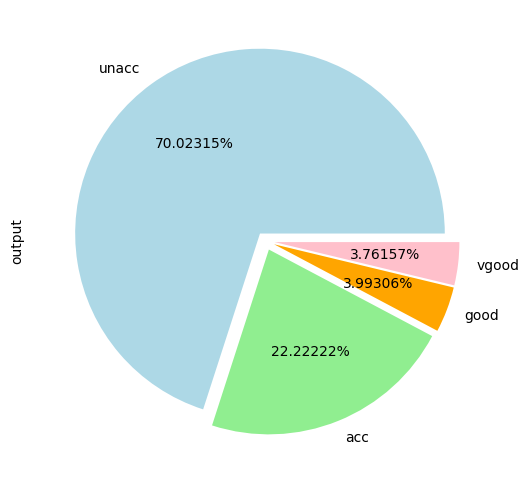

In [18]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 8
fig_size[1] = 6
plt.rcParams["figure.figsize"] = fig_size
dataset.output.value_counts().plot(kind='pie', autopct='%0.05f%%', colors=['lightblue', 'lightgreen', 'orange', 'pink'], explode=(0.05, 0.05, 0.05, 0.05))

이미지 대로 결과는 70%의 불가영역, 20%의 허용상태 나머지 10%의 양호한 상태로 나타납니다.  
앞서 딥러닝에서 텍스트나 이미지는 숫자로 변환해야 한다고 했었습니다. 이를 위해서 데이터 전처리를 진행합니다.  
예제 파일은 범주형 데이터에 속합니다. astype()을 이용해 범주형 타입으로 변환하여 뽑을 수 있습니다.

#### 데이터 변환

In [19]:
categorical_columns = ['price', 'maint', 'doors', 'persons', 'lug_capacity', 'safety']

for category in categorical_columns:
    dataset[category] = dataset[category].astype('category') 

price = dataset['price'].cat.codes.values
maint = dataset['maint'].cat.codes.values
doors = dataset['doors'].cat.codes.values
persons = dataset['persons'].cat.codes.values
lug_capacity = dataset['lug_capacity'].cat.codes.values
safety = dataset['safety'].cat.codes.values

categorical_data = np.stack([price, maint, doors, persons, lug_capacity, safety], 1)
categorical_data[:10]

array([[3, 3, 0, 0, 2, 1],
       [3, 3, 0, 0, 2, 2],
       [3, 3, 0, 0, 2, 0],
       [3, 3, 0, 0, 1, 1],
       [3, 3, 0, 0, 1, 2],
       [3, 3, 0, 0, 1, 0],
       [3, 3, 0, 0, 0, 1],
       [3, 3, 0, 0, 0, 2],
       [3, 3, 0, 0, 0, 0],
       [3, 3, 0, 1, 2, 1]], dtype=int8)

뽑은 카테고리 배열을 텐서로 변환합니다.

In [20]:
categorical_data = torch.tensor(categorical_data, dtype=torch.int64)
categorical_data[:5]

tensor([[3, 3, 0, 0, 2, 1],
        [3, 3, 0, 0, 2, 2],
        [3, 3, 0, 0, 2, 0],
        [3, 3, 0, 0, 1, 1],
        [3, 3, 0, 0, 1, 2]])

아웃풋으로 사용할 열을 텐서로 변환합니다.

In [21]:
outputs = pd.get_dummies(dataset.output) 
outputs = outputs.values
outputs = torch.tensor(outputs).flatten()

print(categorical_data.shape)
print(outputs.shape)

torch.Size([1728, 6])
torch.Size([6912])


get_dummies는 문자를 숫자로 변환시켜줍니다. 다음은 그 예시입니다.

In [22]:
import pandas as pd
import numpy as np

data = {
    'gender' : ['male','female','male'],
    'weight' : [72,55,68],
    'nation' : ['Japan','Korea','Australia']
}

df = pd.DataFrame(data)
df

,gender,weight,nation
0,male,72,Japan
1,female,55,Korea
2,male,68,Australia


In [23]:
pd.get_dummies(df)

,weight,gender_female,gender_male,nation_Australia,nation_Japan,nation_Korea
0,72,0,1,0,1,0
1,55,1,0,0,0,1
2,68,0,1,1,0,0


열과 항목별로 분리되서 문자가 구분되었습니다. 본래 숫자였던 무게는 그대로 나오는 것도 확인할 수 있습니다.

#### 워드 임베딩

워드 임베딩은 유사한 단어는 유사하게 인코딩 되도록 유도하는 것입니다. 이를 위해 칼럼을 적당한 크기로 차원을 분할합니다. 이 때 적당한 크기는 보통 칼럼의 값 종류의 절반을 많이 사용합니다.

In [24]:
categorical_column_sizes = [len(dataset[column].cat.categories) for column in categorical_columns]
categorical_embedding_sizes = [(col_size, min(50, (col_size+1)//2)) for col_size in categorical_column_sizes]
print(categorical_embedding_sizes)

[(4, 2), (4, 2), (4, 2), (3, 2), (3, 2), (3, 2)]


#### 데이터셋 분리

데이터간의 비교를 위해 가진 데이터셋을 훈련/테스트 용으로 분리합니다.

In [25]:
total_records = 1728
test_records = int(total_records * .2)

categorical_train_data = categorical_data[:total_records - test_records]
categorical_test_data = categorical_data[total_records - test_records:total_records]
train_outputs = outputs[:total_records - test_records]
test_outputs = outputs[total_records - test_records:total_records]

print('train data : ', len(categorical_train_data))
print('train output : ',len(train_outputs))
print('test data : ',len(categorical_test_data))
print('test output : ',len(test_outputs))

train data :  1383
train output :  1383
test data :  345
test output :  345


In [26]:
categorical_train_data

tensor([[3, 3, 0, 0, 2, 1],
        [3, 3, 0, 0, 2, 2],
        [3, 3, 0, 0, 2, 0],
        ...,
        [1, 3, 3, 0, 1, 1],
        [1, 3, 3, 0, 1, 2],
        [1, 3, 3, 0, 1, 0]])

#### 모델 네트워크 생성

In [27]:
class Model(nn.Module):
    def __init__(self, embedding_size, output_size, layers, p=0.4): 
        super().__init__() 
        self.all_embeddings = nn.ModuleList([nn.Embedding(ni, nf) for ni, nf in embedding_size])
        self.embedding_dropout = nn.Dropout(p)

        all_layers = []
        num_categorical_cols = sum((nf for ni, nf in embedding_size))
        input_size = num_categorical_cols

        for i in layers:
            all_layers.append(nn.Linear(input_size, i))
            all_layers.append(nn.ReLU(inplace=True))
            all_layers.append(nn.BatchNorm1d(i))
            all_layers.append(nn.Dropout(p))
            input_size = i

        all_layers.append(nn.Linear(layers[-1], output_size))
        self.layers = nn.Sequential(*all_layers)

    def forward(self, x_categorical):
        embeddings = []
        for i,e in enumerate(self.all_embeddings):
            embeddings.append(e(x_categorical[:,i]))
        x = torch.cat(embeddings, 1)
        x = self.embedding_dropout(x)
        x = self.layers(x)
        return x

#### 모델 객체 생성

In [28]:
model = Model(categorical_embedding_sizes, 4, [200,100,50], p=0.4) # embedding_size, output_size, layers, p
print(model)

Model(
  (all_embeddings): ModuleList(
    (0): Embedding(4, 2)
    (1): Embedding(4, 2)
    (2): Embedding(4, 2)
    (3): Embedding(3, 2)
    (4): Embedding(3, 2)
    (5): Embedding(3, 2)
  )
  (embedding_dropout): Dropout(p=0.4, inplace=False)
  (layers): Sequential(
    (0): Linear(in_features=12, out_features=200, bias=True)
    (1): ReLU(inplace=True)
    (2): BatchNorm1d(200, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Dropout(p=0.4, inplace=False)
    (4): Linear(in_features=200, out_features=100, bias=True)
    (5): ReLU(inplace=True)
    (6): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): Dropout(p=0.4, inplace=False)
    (8): Linear(in_features=100, out_features=50, bias=True)
    (9): ReLU(inplace=True)
    (10): BatchNorm1d(50, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (11): Dropout(p=0.4, inplace=False)
    (12): Linear(in_features=50, out_features=4, bias=True)
  )
)


#### 손실할수, 옵티마이저 정의

데이터 분류에서 쓰이는 손실함수는 cross entoropy이며, 옵티마이저는 Adam을 사용합니다.

In [29]:
loss_function = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

#### > CPU/GPU 변경

In [30]:
if torch.cuda.is_available():
    device = torch.device('cuda')
else:
    device = torch.device('cpu')

#### 학습 진행

In [31]:
epochs = 500
aggregated_losses = []
train_outputs = train_outputs.to(device=torch.device('cpu'), dtype=torch.int64)
for i in range(epochs):
    i += 1
    y_pred = model(categorical_train_data)
    single_loss = loss_function(y_pred, train_outputs)
    aggregated_losses.append(single_loss)

    if i%25 == 1:
        print(f'epoch: {i:3} loss: {single_loss.item():10.8f}')

    optimizer.zero_grad()
    single_loss.backward()
    optimizer.step()

print(f'epoch: {i:3} loss: {single_loss.item():10.10f}') 

epoch:   1 loss: 1.55114949
epoch:  26 loss: 1.37025082
epoch:  51 loss: 1.27766967
epoch:  76 loss: 1.19486129
epoch: 101 loss: 1.05937755
epoch: 126 loss: 0.91385806
epoch: 151 loss: 0.84689975
epoch: 176 loss: 0.74302506
epoch: 201 loss: 0.68360686
epoch: 226 loss: 0.66849041
epoch: 251 loss: 0.62983906
epoch: 276 loss: 0.62588149
epoch: 301 loss: 0.60513145
epoch: 326 loss: 0.60492128
epoch: 351 loss: 0.59430146
epoch: 376 loss: 0.58470976
epoch: 401 loss: 0.58446199
epoch: 426 loss: 0.57461971
epoch: 451 loss: 0.57565933
epoch: 476 loss: 0.57541728
epoch: 500 loss: 0.5773746371


#### 모델 테스트

학습이 끝나면 테스트를 할 차례입니다.  
앞에서 분할했던 데이터셋을 모델에 적용시키면 됩니다.  

In [32]:
test_outputs = test_outputs.to(device=torch.device('cpu'), dtype=torch.int64)
with torch.no_grad():
    y_val = model(categorical_test_data)
    loss = loss_function(y_val, test_outputs)
print(f'Loss: {loss:.8f}')

Loss: 0.56007779


테스트 상의 손실 값과 학습에서의 손실값이 비슷한 것으로 과적합은 없다는 것을 알 수 있습니다.

In [33]:
print(y_val.shape)

torch.Size([345, 4])


In [34]:
print(y_val[:5])

tensor([[ 2.8803,  1.6164, -3.5301, -3.7523],
        [ 2.8611,  1.7441, -3.6770, -3.8482],
        [ 1.6909,  0.8945, -2.7427, -2.6535],
        [ 2.4260,  1.3452, -3.1996, -3.4322],
        [ 2.4905,  1.4429, -4.0331, -3.5756]])


본래 목적인 모델의 예측을 확인하기 위해 출력층을 뽑아봤지만, 가독성이 떨어집니다.

In [35]:
y_val = np.argmax(y_val, axis=1)
print(y_val[:5])

tensor([0, 0, 0, 0, 0])


In [36]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(test_outputs,y_val))
print(classification_report(test_outputs,y_val))
print(accuracy_score(test_outputs, y_val))

[[259   0]
 [ 85   1]]
              precision    recall  f1-score   support

           0       0.75      1.00      0.86       259
           1       1.00      0.01      0.02        86

    accuracy                           0.75       345
   macro avg       0.88      0.51      0.44       345
weighted avg       0.81      0.75      0.65       345

0.7536231884057971


#### 딥러닝 분류 모델의 성능 평가

성능 평가 지표에는 정확도, 재현율, 정밀도, F1-스코어 라는 것이 존재합니다.
이를 계산하기 위해 4가지 분류의 용어가 사용됩니다.

* True Positive : 모델의 출력값이 1이고, 실제 값도 1인 경우
* True Nagative : 모델의 출력값이 0이고, 실제 값도 0인 경우
* False Positive : 모델의 출력값이 1이지만, 실제 값은 0인 경우
* False Nagative : 모델의 출력값은 0이지만, 실제 값은 1인 경우


* 정확도(Accuracy) : 전체 예측 건수 중 정답의 비율 입니다. 

$${True Positive + True Negative \over True Positive + True Negative + False Positive + False Negative}$$

* 재현율(Recall) : 정답이 1일 때 모델 출력값이 1인 비율입니다.

$${True Positive \over True Positive + False Negative}$$

* 정밀도(Precision) : 모델의 출력값이 1일 때 실제 값이 1인 비율입니다.

$${True Positive \over True Positive + False Positive}$$

* F-1 스코어 : 정밀도와 재현율은 트레이드오프 관계라고 합니다. 한 쪽이 높으면 한 쪽이 낮아지는 관계를 말합니다. 이를 조화롭게 평균을 낸 것을 일컫습니다.

$$ 2 * {Precision * Recall \over Precision + Recall}$$

#### stack의 작동

In [37]:
a = np.array([[1,2],[3,4]])
b = np.array([[5,6],[7,8]])


print(a,a.shape)
print('-----axis=0-----')
print(a.reshape(1,2,2), a.reshape(1,2,2).shape)
print('-----axis=1-----')
print(a.reshape(2,1,2), a.reshape(2,1,2).shape)
print('-----sxis=2------')
print(a.reshape(2,2,1), a.reshape(2,2,1).shape)

print('-----stack-----')
print('-----axis0-----')
print(np.stack((a,b),axis=0))
print('-----axis1-----')
print(np.stack((a,b),axis=1))
print('-----axis2-----')
print(np.stack((a,b),axis=2))

[[1 2]
 [3 4]] (2, 2)
-----axis=0-----
[[[1 2]
  [3 4]]] (1, 2, 2)
-----axis=1-----
[[[1 2]]

 [[3 4]]] (2, 1, 2)
-----sxis=2------
[[[1]
  [2]]

 [[3]
  [4]]] (2, 2, 1)
-----stack-----
-----axis0-----
[[[1 2]
  [3 4]]

 [[5 6]
  [7 8]]]
-----axis1-----
[[[1 2]
  [5 6]]

 [[3 4]
  [7 8]]]
-----axis2-----
[[[1 5]
  [2 6]]

 [[3 7]
  [4 8]]]


<img src="stack1.png" width = 500></img>
<img src="stack2.png" width = 500></img>